In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the EastWestAirlines dataset
# Assuming the dataset is in a CSV file, adjust the path if necessary
data = pd.read_csv('dataset/EastWestAirlines.csv')

In [ ]:
# Check the first few rows of the data to understand its structure
print(data.head())

In [6]:
data.head(0)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [7]:
# Step 1: Data Preprocessing
# Dropping the 'ID' column and any non-numeric columns if present
# (Adjust this part based on the structure of your dataset)
data_cleaned = data.drop(columns=['ID#'])  # Adjust column names as necessary

In [8]:
# Handle missing values (if any)
data_cleaned = data_cleaned.fillna(data_cleaned.mean())  # Replace missing values with the mean


In [9]:
# Step 2: Feature Scaling (Standardizing the data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [15]:
# Convert scaled data into a DataFrame for easier manipulation
data_scaled_df = pd.DataFrame(data_scaled, columns=data_cleaned.columns)

# Step 3: Apply Agglomerative Clustering
# Define the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Set the number of clusters (n_clusters can be adjusted)


In [17]:
# Fit the model and predict cluster labels
data_scaled_df['Cluster'] = agg_clustering.fit_predict(data_scaled)


In [22]:
# Display the cluster assignments
data_cleaned.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [18]:
# Step 5: Visualize the clusters
# If the dataset has more than 2 dimensions, reduce to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


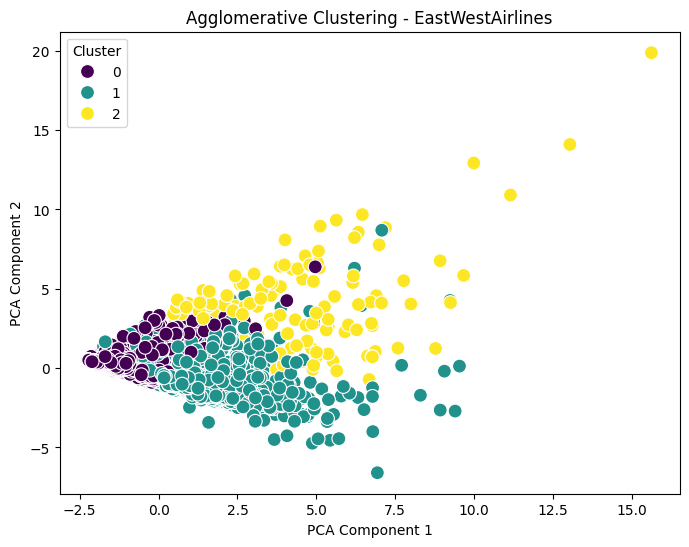

In [21]:
# Create a scatter plot with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=data_scaled_df['Cluster'], palette='viridis', s=100)
plt.title('Agglomerative Clustering - EastWestAirlines')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()